In [348]:
import numpy as np
from numpy import random
import pandas as pd
import pygraphviz as pgv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import itertools

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


def rule_one_possible(string):
    
    # If the last letter of the current string is I, rule 1 can be applied
    
    if string[-1:] == 'I':
        return True
    
    else:
        return False


def rule_two_possible(string):
    
    # If the first letter of the current string is M, rule 2 can be applied
    
    if string[:1] == 'M':
        return True
    else:
        return False


def rule_three_possible(string):
    
    # If the current string contains III, rule 3 can be applied
     
    if string.find('III') != -1:
        return True
    else:
        return False
    

def rule_four_possible(string):
    
    # If the current string contains UU, rule 4 can be applied
    
    if string.find('UU') != -1:
        return True
    else:
        return False    
    

def rule_three_indices(string):
    
    indices = [index for index, char in enumerate(string) if string.startswith('III', index)]

    return indices


def get_options(string, omit_labels=False):

    options = dict()

    if rule_one_possible(string):
        options['1'] = apply_rule_one(string)

    if rule_two_possible(string):
        options['2'] = apply_rule_two(string)

    if rule_three_possible(string):
        for index in rule_three_indices(string):
            options[f'3i{index}'] = apply_rule_three(string, index)
        
    if rule_four_possible(string):
        options['4'] = apply_rule_four(string)

        
    if omit_labels == True:    
        return list(options.values())

    else:
        return options

def apply_rule_one(string):
    
    return string + 'U'


def apply_rule_two(string):
    
    return string + string[1:]


def apply_rule_three(string, index):
    
    return string[:index] + 'U' + string[index+3:]


def apply_rule_four(string):
    
    # the output of rule four is invariant under which index it is applied at
    
    index = string.find('II')
    
    string = string[:index] + string[index+2:]

    return string


def random_traversal(string, num_steps):
    
    # take a random walk through the local network 
    
    path = dict()
    rules = [None,]
    strings = [string,]
    
    i=0
    while i < num_steps:

        options = get_options(string)
        
        rule = random.choice(list(options.keys()))
        string = options[rule]
        
        rules.append(rule)
        strings.append(string)
    
        i+=1
        
    path['rules'] = rules
    path['strings'] = strings

    return path


def discover_local_network(string, num_steps):

    nodes = set([string])
    edges = set()
    
    i=0
    while i<num_steps:
        
        new_neighbours = []
        for node in nodes:
            
            neighbours = get_options(node, omit_labels=True)   
            
            for neighbour in neighbours:
                edges.add(tuple([node, neighbour]))
                new_neighbours.append(neighbour)
    
        for new_neighbour in new_neighbours:
            nodes.add(new_neighbour)
    
        i+=1
    
    network = dict()
    network['nodes'] = nodes
    network['edges'] = edges
    
    return network
    

In [393]:
network = discover_local_network('MI', num_steps=5)

adj = pd.DataFrame(0, index = network['nodes'], columns=network['nodes'])

for edge in network['edges']:
    adj.loc[edge[1], edge[0]] = 1

{('MI', 'MII'),
 ('MI', 'MIU'),
 ('MII', 'MIIII'),
 ('MII', 'MIIU'),
 ('MIIII', 'MIIIIIIII'),
 ('MIIII', 'MIIIIU'),
 ('MIIII', 'MIU'),
 ('MIIII', 'MUI'),
 ('MIIU', 'MIIUIIU'),
 ('MIU', 'MIUIU'),
 ('MIUIU', 'MIUIUIUIU')}

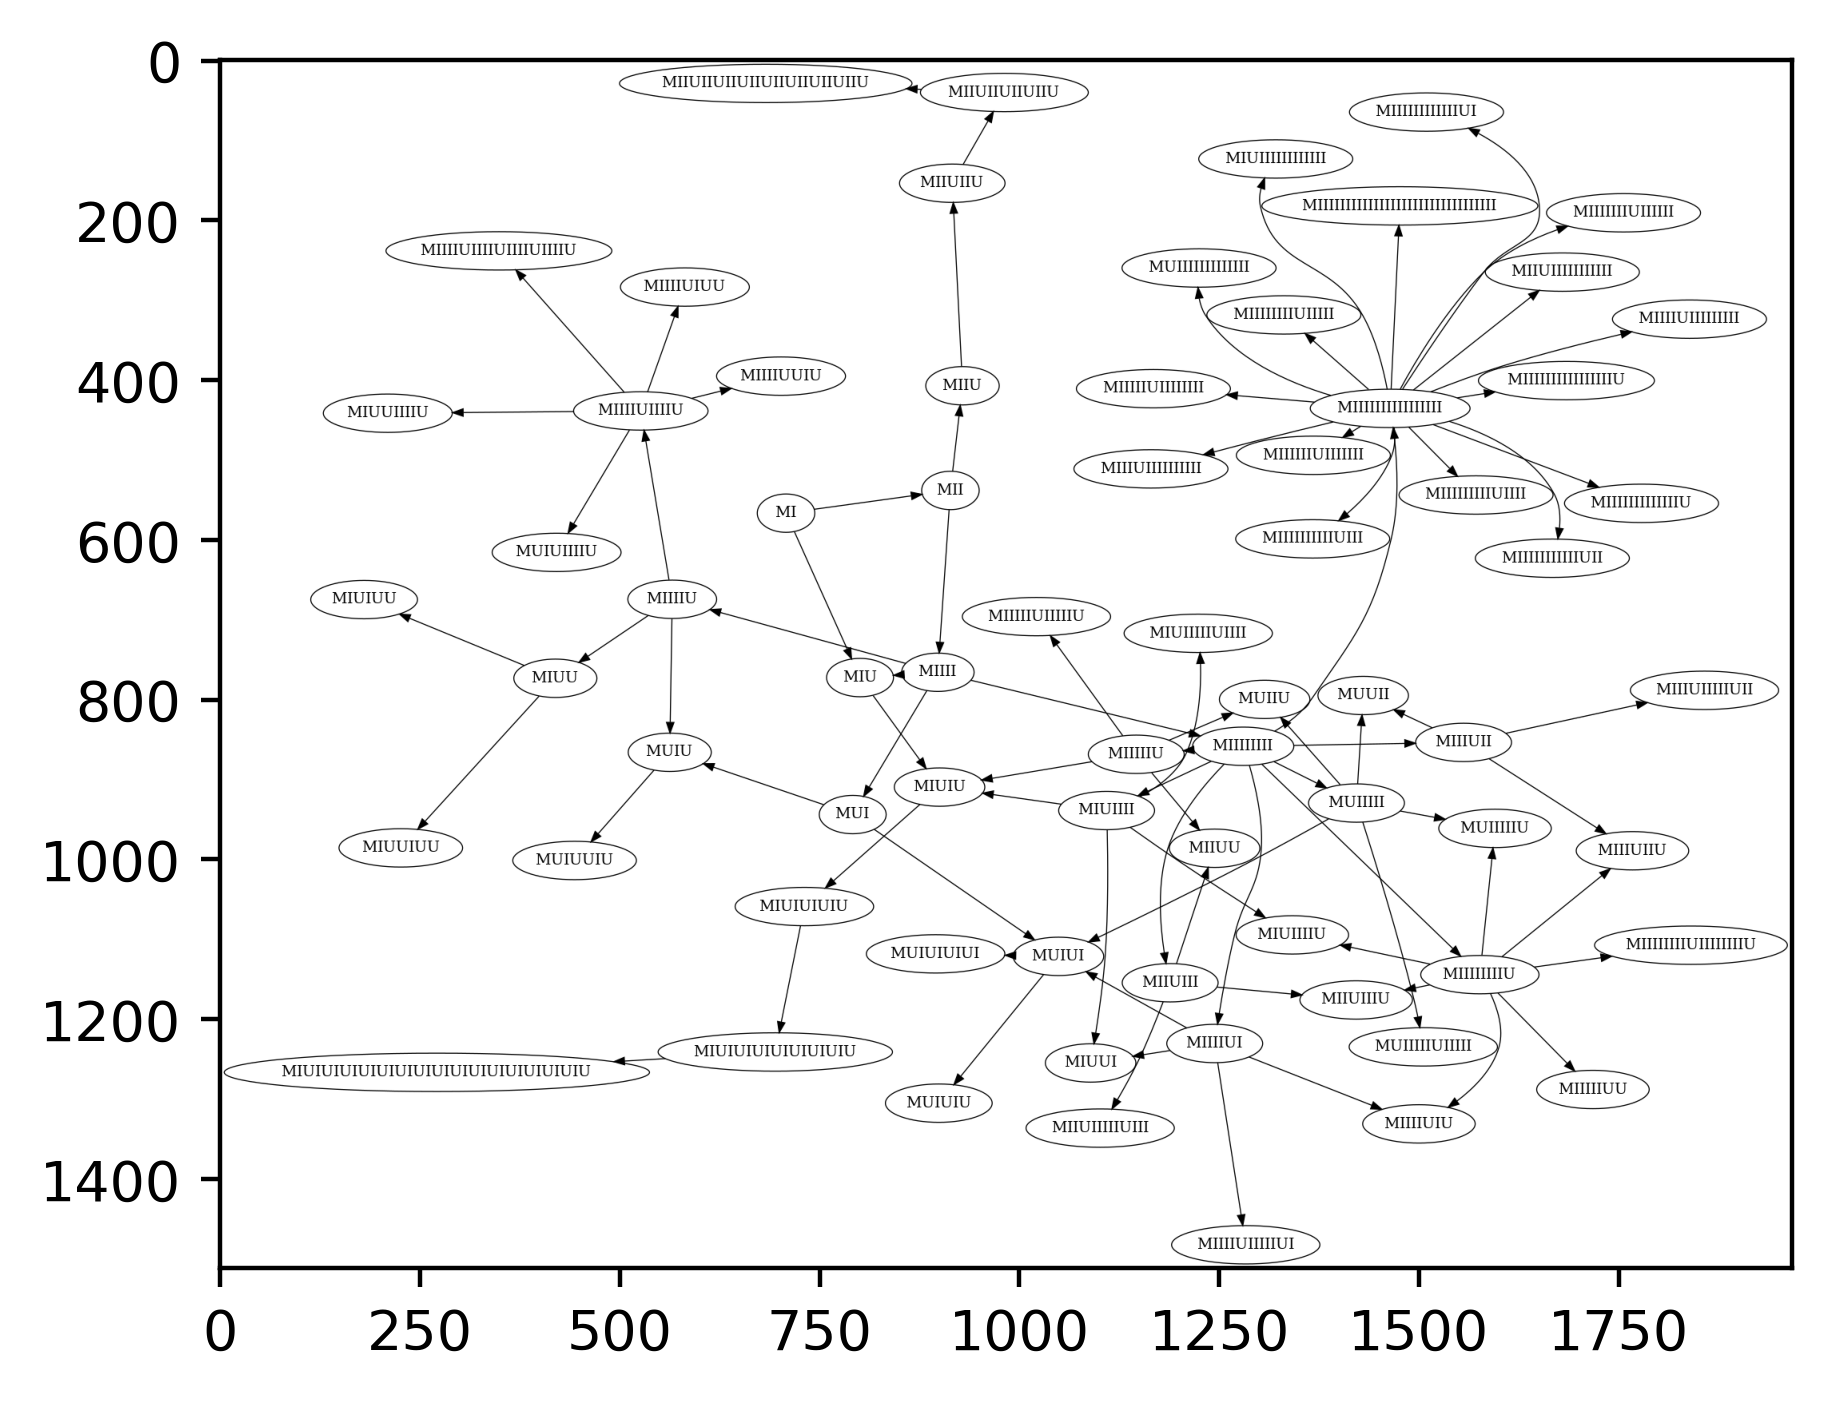

In [394]:
# plot the nodes visited in the random traversal above

plt.rcParams['figure.dpi'] = 400

dag = pgv.AGraph(directed=True, overlap='false', splines='true')

for node in network['nodes']:
    dag.add_node(node)

for edge in network['edges']:
    dag.add_edge(edge)

dag.layout(prog='fdp')  #neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.
dag.draw('dag.png')

img = mpimg.imread('dag.png')
plt.imshow(img)
plt.show()

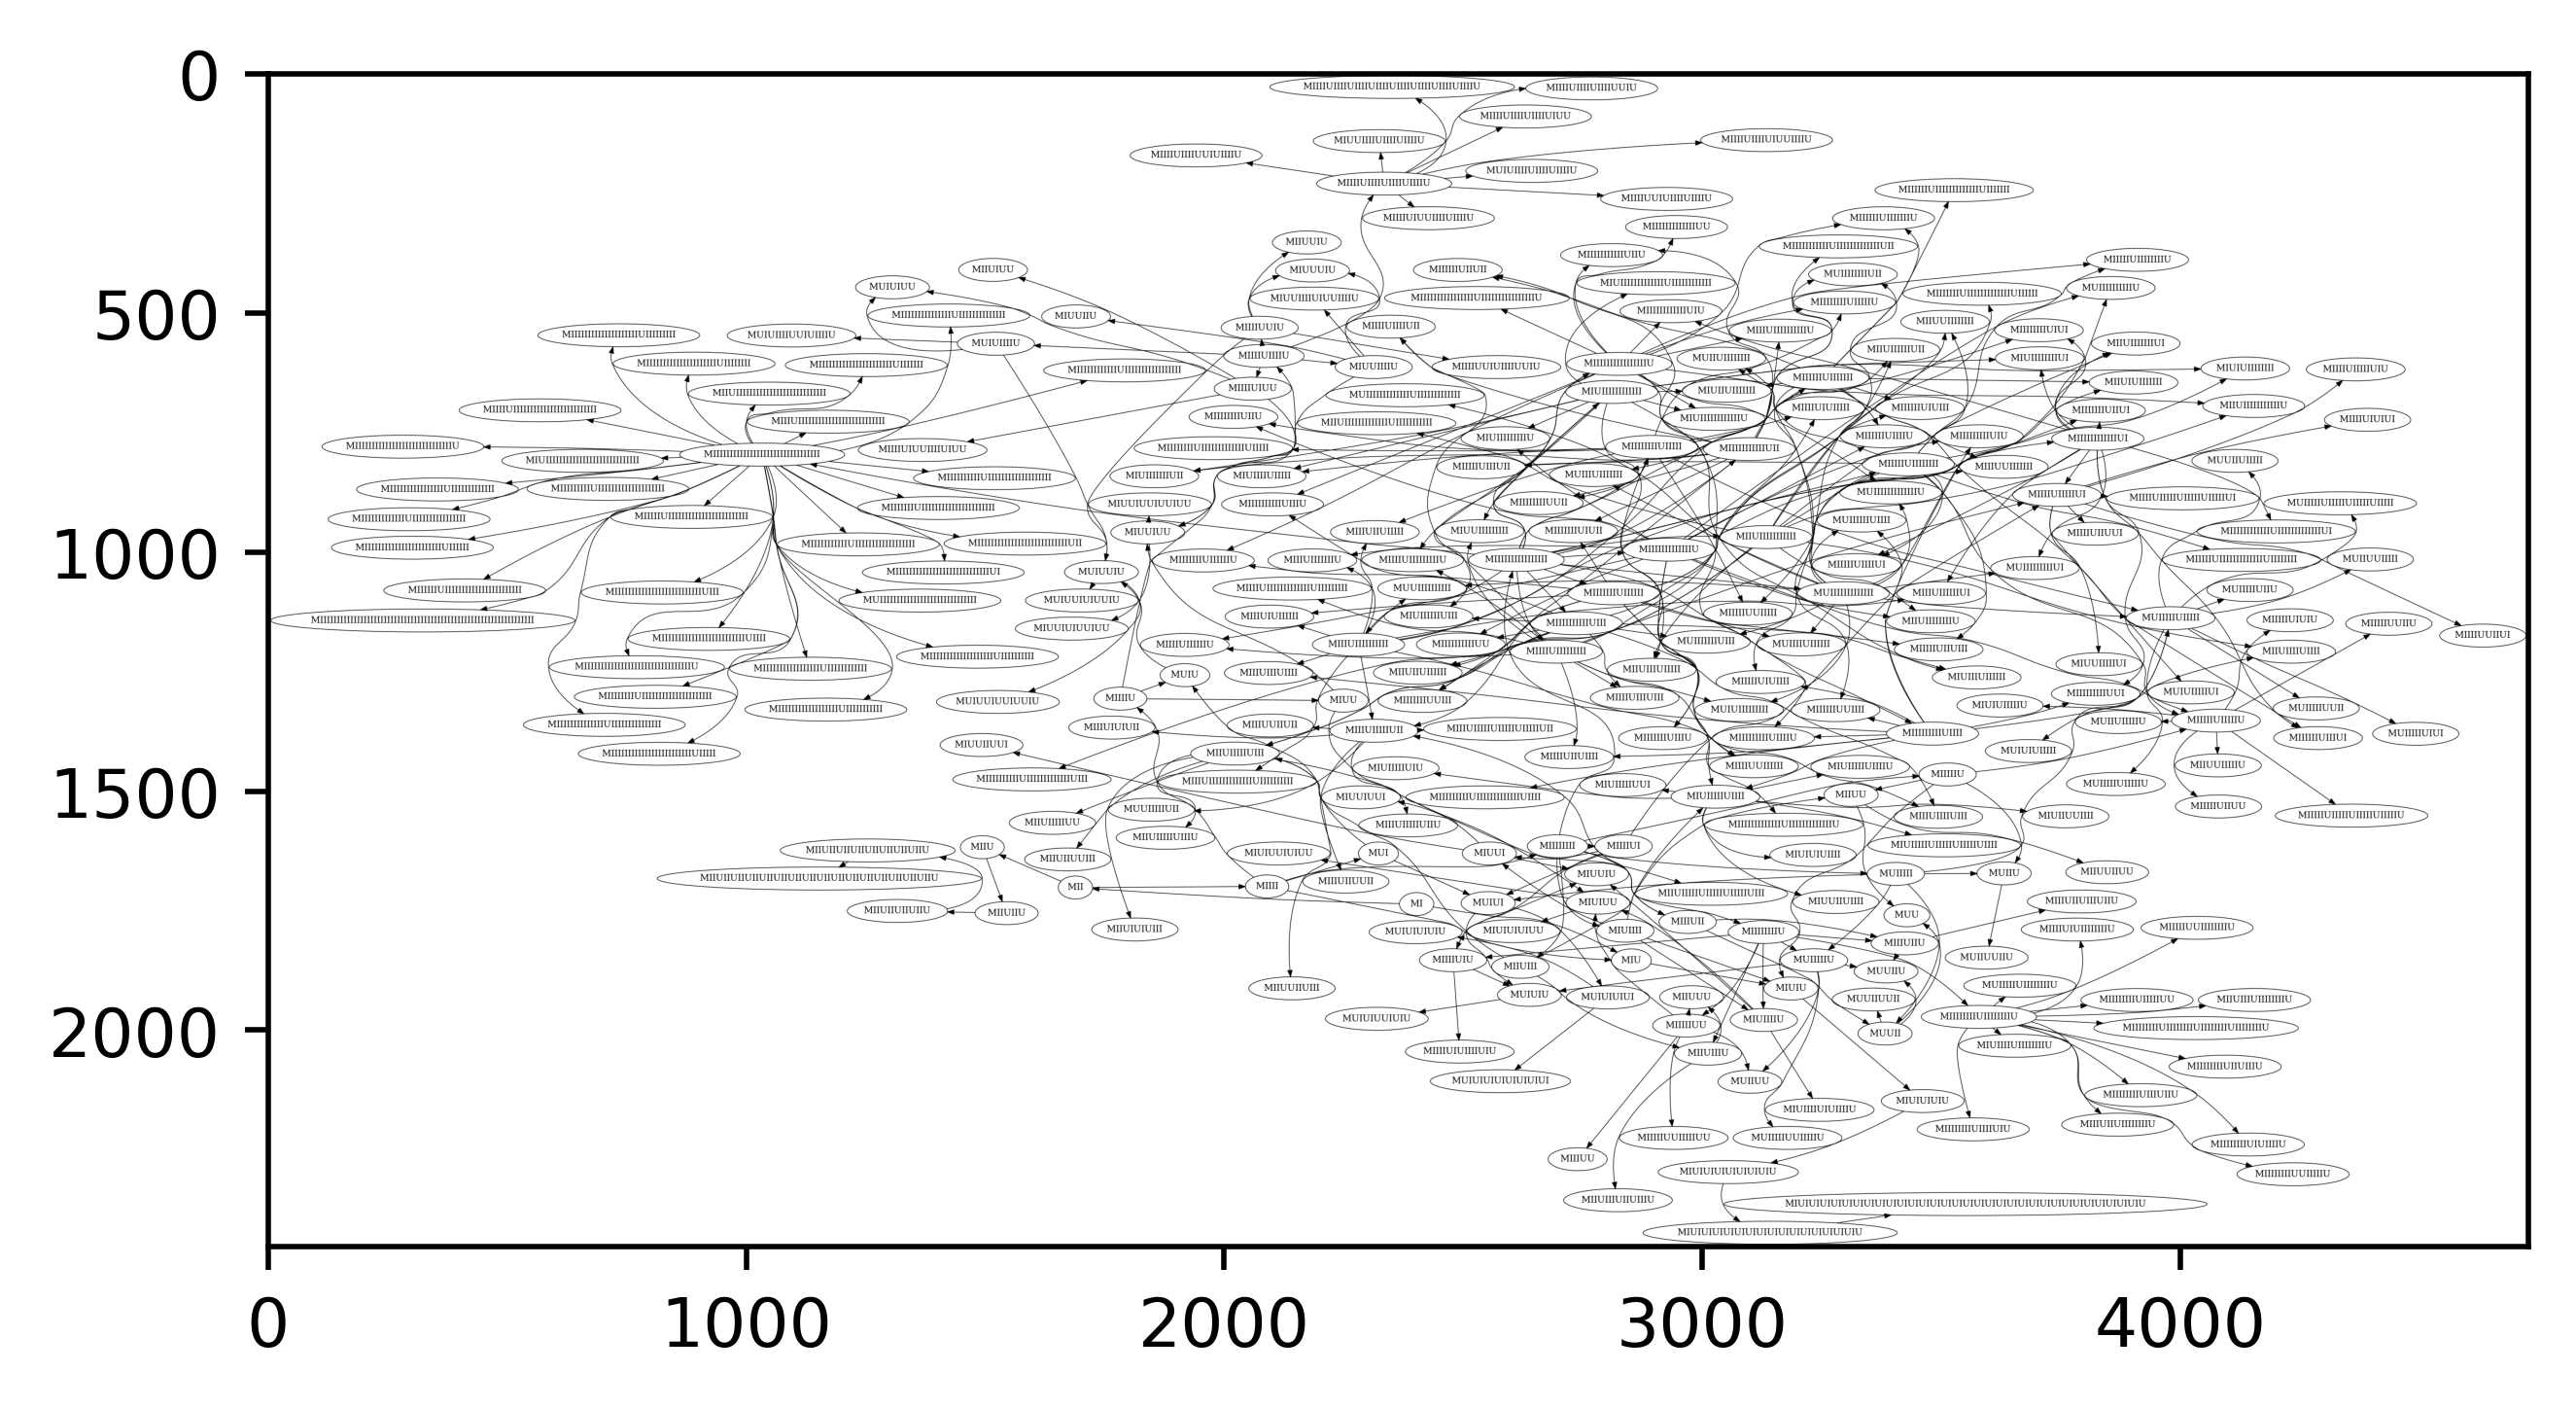

In [374]:
# plot the nodes visited in the random traversal above

plt.rcParams['figure.dpi'] = 500

dag = pgv.AGraph(directed=True, overlap='false', splines='true')

for node in adj.index:
    dag.add_node(node)

for index in adj.index:
    for child in adj.columns:
        for parent in adj.index[adj[child] == True]:
            dag.add_edge(child, parent)

dag.layout(prog='fdp')  #neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.
dag.draw('dag.png')

img = mpimg.imread('dag.png')
plt.imshow(img)
plt.show()

In [ ]:
#   def get_options(string):
#   
#       options = []
#   
#       if rule_one_possible(string):
#           options.append(f'apply_rule_one(string)')
#   
#       if rule_two_possible(string):
#           options.append('apply_rule_two(string)')
#   
#       if rule_three_possible(string):
#           for option in rule_three_options(string):
#               options.append(f'apply_rule_three(string, {option})')
#           
#       if rule_four_possible(string):
#           for option in rule_four_options(string):
#               options.append(f'apply_rule_four(string, {option})')
#   
#       return options
#  
#   
#   
#   def random_traversal(string, num_moves):
#       
#       path = [string]
#       
#       i=0
#       while i < num_moves:
#   
#           options = get_options(string)
#           
#           string = random.choice(list(options))
#           
#           path.append(string)
#       
#           i+=1
#   
#       return path




#  start = 'MI'
#  routes = []
#  
#  print(list(get_options(start).values()))
#  
#  print(list(product(zeroth, first)))
#  
#  
#  i=0
#  while i < 3:
#      routes.append(list(get_options(start).values()))
#      i+=1
#          
#          
#  
#  
#  #paths = [['MI','MIU'],['MI', 'MII']]
#  
#  paths = [['MI',],]
#  
#  for path in paths:
#  
#      endpoint = [path[-1]]
#      neighbours = get_options(path[-1], omit_labels=True)
#      newbits = [list(tup) for tup in product(endpoint, neighbours)]
#  
#      print('path: ', path)
#      print('endpoint: ', endpoint)
#      print('neighbours: ', neighbours)
#      print('newbits: ', newbits)
#      print('\n')
#      
#      path = path[:-1]
#      
#      
#   
#      
#  #neighbour_nodes = list(get_options(string).values())
#      
#  #paths = list(product(string, neighbour_nodes)))






#  paths = [['MI',],]
#  
#  i=0
#  while i < 6:
#      
#      for path in paths:
#          neighbours = get_options(path[-1], omit_labels=True)
#          result = [list(tup) for tup in itertools.product(paths, neighbours)]
#      i+=1
#      paths=result
#      print(paths)
#      print(len(paths))
#  


#   ### THIS ONE ####
#   
#   nodes = set(['MI'])
#   edges = set()
#   
#   i=0
#   while i<3:
#       
#       new_neighbours = []
#       for node in nodes:
#           
#           neighbours = get_options(node, omit_labels=True)   
#           
#           for neighbour in neighbours:
#               edges.add(tuple([node, neighbour]))
#               new_neighbours.append(neighbour)
#   
#       for new_neighbour in new_neighbours:
#           nodes.add(new_neighbour)
#   
#       i+=1
#   
#   
#   for edge in set(edges):
#       print('edge: ', edge)
#       
#   for node in set(nodes):
#       print('node: ', node)
#   
#   
#   
#   
#   









